# Project Sprint 12 : "Rusty Bargain" Car Sales Price Prediction

## Introduction

Rusty Bargain is a used car buying and selling company that is developing an app to attract new buyers. In the app, you can quickly find out the market value of your car. You have access to historical data, vehicle technical specifications, vehicle model version, and vehicle price.

### Goal

This project aims to develop a model capable of determining the market value of cars for the company "Rusty Bargain" which Rusty Bargain is interested in:
- quality of predictions;
- the speed of the model in predicting;
- the time required to train the model

### Steps

Historical data, vehicle technical specifications, vehicle model versions, and vehicle prices are stored in the filepath: `/datasets/car_data.csv`. Model development was carried out in the following main steps:
1. Data Preparation
2. Training Model with Various Hyperparameters
3. Model Speed and Quality Analysis

### Overview

**1. Introduction**
- Objective
- Stages

**2. Data Preparation**
- Initialization
- Load Dataset
- Data Preparation
- Data Cleansing
- Data Pre-Processing

**3. Model Training**
- Linear Regression
- Random Forest Regressor
- Gradient Boosting

**4. Model Analysis**

**5. General Conclusion**

## Data Preparation

### Initialization

To perform data analysis and pre-processing, we first loaded libraries that can assist these activities, namely:
1. `Pandas` Library
2. `Seaborn` Library
3. `MatPlotLibt` Library

In [1]:
# Memuat library pandas
import pandas as pd

# Muat seaborn library
import seaborn as sns

# Muat matplotlib library
from matplotlib import pyplot as plt

### Loading Dataset

The initial historical vehicle data stored in the filepath : `/datasets/car_data.csv`, will be loaded in the variable `car`.

In [2]:
# memuat dataset dan menyimpannya dalam variabel car
car = pd.read_csv('/datasets/car_data.csv')

### Data Preparation

We will look at the data sample, general data information, and descriptive statistics of the data.

In [3]:
# menampilkan sampel data
car.head()

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Mileage,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,24/03/2016 11:52,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,24/03/2016 00:00,0,70435,07/04/2016 03:16
1,24/03/2016 10:58,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,24/03/2016 00:00,0,66954,07/04/2016 01:46
2,14/03/2016 12:52,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,14/03/2016 00:00,0,90480,05/04/2016 12:47
3,17/03/2016 16:54,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,17/03/2016 00:00,0,91074,17/03/2016 17:40
4,31/03/2016 17:25,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,31/03/2016 00:00,0,60437,06/04/2016 10:17


In [4]:
# menampilkan statistika deskriptif data
car.describe()

,Price,RegistrationYear,Power,Mileage,RegistrationMonth,NumberOfPictures,PostalCode
count,354369.000000,354369.000000,354369.000000,354369.000000,354369.000000,354369.0,354369.000000
mean,4416.656776,2004.234448,110.094337,128211.172535,5.714645,0.0,50508.689087
std,4514.158514,90.227958,189.850405,37905.341530,3.726421,0.0,25783.096248
min,0.000000,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.000000
25%,1050.000000,1999.000000,69.000000,125000.000000,3.000000,0.0,30165.000000
50%,2700.000000,2003.000000,105.000000,150000.000000,6.000000,0.0,49413.000000
75%,6400.000000,2008.000000,143.000000,150000.000000,9.000000,0.0,71083.000000
max,20000.000000,9999.000000,20000.000000,150000.000000,12.000000,0.0,99998.000000


In [5]:
# menampilkan informasi umum data
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        354369 non-null  object
 1   Price              354369 non-null  int64 
 2   VehicleType        316879 non-null  object
 3   RegistrationYear   354369 non-null  int64 
 4   Gearbox            334536 non-null  object
 5   Power              354369 non-null  int64 
 6   Model              334664 non-null  object
 7   Mileage            354369 non-null  int64 
 8   RegistrationMonth  354369 non-null  int64 
 9   FuelType           321474 non-null  object
 10  Brand              354369 non-null  object
 11  NotRepaired        283215 non-null  object
 12  DateCreated        354369 non-null  object
 13  NumberOfPictures   354369 non-null  int64 
 14  PostalCode         354369 non-null  int64 
 15  LastSeen           354369 non-null  object
dtypes: int64(7), object(

***
Based on the sample of funds and general data information, a description of the dataset is obtained, among others:
1. The dataset is 15 columns in size with 354369 observations, where the column title format is capitalized, and then the column title case will be fixed with the **.str.lower()** method.
2. There are some two data types in the dataset, and interestingly, there are columns with object or string data types. To facilitate modeling, categorical columns will be re-analyzed and pre-processed with the help of **Ordinal Encoder** technique.
3. Some columns have a different number of non-nulls than the RangeIndex, so there may be missing values in these columns. Will be checked with **.isna()** method.
4. There are some anomalies in the descriptive statistics of the data, namely :
The minimum `1000` and maximum `9999` values in the `RegistrationYear` column are a little unreasonable, so we will take `RegistrationYear` information in the range `1900 - 2023` (based on the estimated development of cars in Europe until this year).
- minimum value of `0` in column `power`, the dataset information with `power` more than `0` will be retrieved.
- minimum value `0` in column `RegistrationMonth`, will retrieve dataset information with `RegistrationMonth` greater than `0`.
- the minimum and maximum values of the `NumberOfPictures` column are `0`, so this column will be dropped from the dataset.

Observations with the above anomalies will be selected from the dataset.

### Data Cleaning

**Fix Column Title**

In [6]:
# mengubah case kolom menjadi lowercase
car.columns = car.columns.str.lower()

**Check Missing Value**

In [7]:
# menampilkan persentase data yang hilang
a = car.count()
b = car.fillna(-1).count() 
c = pd.concat([a, b], axis=1)
c.columns = ['not_null', 'total']
c['null'] = c['total'] - c['not_null'] 
c = c[['null', 'not_null', 'total']]
c['percent_null'] = c['null']*100 / c['total']
c

,null,not_null,total,percent_null
datecrawled,0,354369,354369,0.000000
price,0,354369,354369,0.000000
vehicletype,37490,316879,354369,10.579368
registrationyear,0,354369,354369,0.000000
gearbox,19833,334536,354369,5.596709
power,0,354369,354369,0.000000
model,19705,334664,354369,5.560588
mileage,0,354369,354369,0.000000
registrationmonth,0,354369,354369,0.000000
fueltype,32895,321474,354369,9.282697


Based on the display above, it is known that missing values only occur in columns with the data type `object`, where the highest percentage of missing values is in the `notrepaired` column. To facilitate model training, these missing values will be replaced with "null" objects.

In [8]:
# mengganti nilai yang hilang dengan null
car.fillna('null', inplace=True)

In [9]:
# mengecek kembali nilai yang hilanng
car.isna().sum()

datecrawled          0
price                0
vehicletype          0
registrationyear     0
gearbox              0
power                0
model                0
mileage              0
registrationmonth    0
fueltype             0
brand                0
notrepaired          0
datecreated          0
numberofpictures     0
postalcode           0
lastseen             0
dtype: int64

The missing values have been dealt with, so the next step is to select the anomalous data.

**Selection of Data Anomalies**

In [10]:
# menyeleksi anomali data pada dataset
car = car[car['registrationyear'] >= 1900]
car = car[car['registrationyear'] <= 2023]
car = car[car['power'] > 0]
car = car[car['registrationmonth'] > 0]
car = car.drop('numberofpictures', axis =1)

In [11]:
car.describe()

,price,registrationyear,power,mileage,registrationmonth,postalcode
count,292084.000000,292084.000000,292084.000000,292084.000000,292084.000000,292084.000000
mean,4892.385687,2003.354268,124.539314,128034.931732,6.381551,51212.459207
std,4635.917776,6.829569,186.827163,36848.065917,3.347519,25752.745797
min,0.000000,1910.000000,1.000000,5000.000000,1.000000,1067.000000
25%,1350.000000,1999.000000,77.000000,125000.000000,4.000000,30938.000000
50%,3200.000000,2003.000000,113.000000,150000.000000,6.000000,50259.000000
75%,7000.000000,2008.000000,150.000000,150000.000000,9.000000,72070.000000
max,20000.000000,2019.000000,20000.000000,150000.000000,12.000000,99998.000000


Data anomaly selection has been completed; next, perform data pre-processing.

### Data Pre-Processing

#### Correlation between features and variable selection

To see the correlation between features and targets on the `car` dataset, it will be done with the help of the **.corr()** method.

<AxesSubplot:>

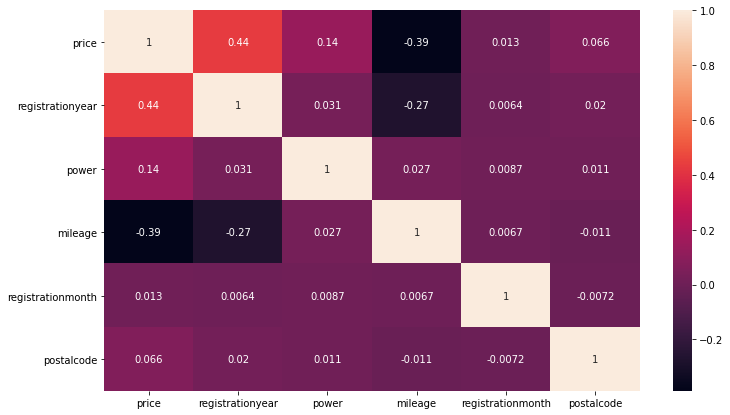

In [12]:
# menampilkan korelasi antar fitur numerik dan target
from matplotlib.pyplot import figure
figure(figsize = (12, 7))
sns.heatmap(car.corr(), annot=True)

Based on the correlation value information above, the correlation value between the feature and the target is quite low. The same thing also happens between other features, although there is a fairly large correlation between the `registrationyear` feature and the `price` target of `0.44` which is where the greater the value of `milage` the selling price of the car tends to be high. The `registrationmonth` feature has a very low correlation with the target of `0.013` so this column will be cropped from the dataset along with the `datecrawled`, `datecreated`, and `lastseen` columns, which are unique information about each vehicle.

In [13]:
# menyeleksi fitur
new_car = car.drop(['registrationmonth', 'datecrawled', 'datecreated', 'lastseen'], axis=1)
new_car

,price,vehicletype,registrationyear,gearbox,power,model,mileage,fueltype,brand,notrepaired,postalcode
1,18300,coupe,2011,manual,190,null,125000,gasoline,audi,yes,66954
2,9800,suv,2004,auto,163,grand,125000,gasoline,jeep,null,90480
3,1500,small,2001,manual,75,golf,150000,petrol,volkswagen,no,91074
4,3600,small,2008,manual,69,fabia,90000,gasoline,skoda,no,60437
5,650,sedan,1995,manual,102,3er,150000,petrol,bmw,yes,33775
...,...,...,...,...,...,...,...,...,...,...,...
354361,5250,null,2016,auto,150,159,150000,null,alfa_romeo,no,51371
354362,3200,sedan,2004,manual,225,leon,150000,petrol,seat,yes,96465
354366,1199,convertible,2000,auto,101,fortwo,125000,petrol,smart,no,26135
354367,9200,bus,1996,manual,102,transporter,150000,gasoline,volkswagen,no,87439


#### OHE

According to the preliminary findings information, there are object/categorical data in the `new_car` dataset, namely in the `vehicletype`, `gearbox`, `model`, `fueltype`, `brand`, `notrepaired` columns, so it is necessary to do coding with the **Ordinal Encoder** method from the sklearn.preprocessing module and **One-Hot Encoding (OHE)**.

Before performing OHE, we will first check the number of unique values in each categorical column so that the OHE process is not too complex and potentially reduces the quality of modeling.

In [14]:
# mengecek jumlah nilai unik pad akolom kategorik
categoric = ['vehicletype', 'gearbox', 'model', 'fueltype', 'brand', 'notrepaired']
new_car[categoric].nunique()

vehicletype      9
gearbox          3
model          250
fueltype         8
brand           40
notrepaired      3
dtype: int64

Based on the results above, it is known that the `model` and `brand` columns have a large number of unique values of `250` and `40`, therefore these two columns will be dropped from the dataset.

In [15]:
# menyeleksi kolom model dan brand
car_ohe = new_car.drop(['model', 'brand'], axis = 1)
car_ohe

,price,vehicletype,registrationyear,gearbox,power,mileage,fueltype,notrepaired,postalcode
1,18300,coupe,2011,manual,190,125000,gasoline,yes,66954
2,9800,suv,2004,auto,163,125000,gasoline,null,90480
3,1500,small,2001,manual,75,150000,petrol,no,91074
4,3600,small,2008,manual,69,90000,gasoline,no,60437
5,650,sedan,1995,manual,102,150000,petrol,yes,33775
...,...,...,...,...,...,...,...,...,...
354361,5250,null,2016,auto,150,150000,null,no,51371
354362,3200,sedan,2004,manual,225,150000,petrol,yes,96465
354366,1199,convertible,2000,auto,101,125000,petrol,no,26135
354367,9200,bus,1996,manual,102,150000,gasoline,no,87439


The dataset is ready for Ordinal Encoder.

In [16]:
# melakukan ohe
car_ohe = pd.get_dummies(car_ohe)
print(car_ohe.shape)

(292084, 28)


In [17]:
# menampilkan hasil ohe
car_ohe.head(2)

,price,registrationyear,power,mileage,postalcode,vehicletype_bus,vehicletype_convertible,vehicletype_coupe,vehicletype_null,vehicletype_other,...,fueltype_electric,fueltype_gasoline,fueltype_hybrid,fueltype_lpg,fueltype_null,fueltype_other,fueltype_petrol,notrepaired_no,notrepaired_null,notrepaired_yes
1,18300,2011,190,125000,66954,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
2,9800,2004,163,125000,90480,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0


#### Ordinal Encoder

The next step is to do the ordinal encoder separately from the dataset that has been done OHE.

In [18]:
# import funsi ordinal encoder dari model sklearn.preprocessing
from sklearn.preprocessing import OrdinalEncoder

# melakukan ordinal encoder
new_car[categoric] = OrdinalEncoder().fit_transform(new_car[categoric])
new_car.head()

,price,vehicletype,registrationyear,gearbox,power,model,mileage,fueltype,brand,notrepaired,postalcode
1,18300,2.0,2011,1.0,190,163.0,125000,2.0,1.0,2.0,66954
2,9800,7.0,2004,0.0,163,117.0,125000,2.0,14.0,1.0,90480
3,1500,6.0,2001,1.0,75,116.0,150000,7.0,38.0,0.0,91074
4,3600,6.0,2008,1.0,69,101.0,90000,2.0,31.0,0.0,60437
5,650,5.0,1995,1.0,102,11.0,150000,7.0,2.0,2.0,33775


The coding is done successfully, then the training, validation, and test sets are prepared.

#### Prepare training set, validation set, and test set

Splitting data on the `new_car` dataset is done with the **TrainSplitTest** function from the sklearn.preprocessing module, where the proportions of training, validation, and test data are as follows:
1. Training set: **60%**
2. Validation set: **20%**
3. Test_set: **20%**

**OHE**

In [19]:
# mengimport fungsi trainsplittest
from sklearn.model_selection import train_test_split

# melakukan splitting data
tmp, car_valid_ohe = train_test_split(car_ohe, test_size = 0.2, random_state=12345)
car_train_ohe, car_test_ohe = train_test_split(tmp, test_size = 0.25, random_state=12345)

# menampilkan ukuran dataset baru
print(car_train_ohe.shape)
print(car_valid_ohe.shape)
print(car_test_ohe.shape)

(175250, 28)
(58417, 28)
(58417, 28)


**Ordinal Encoding**

In [20]:
# melakukan splitting data
tmp, car_valid = train_test_split(new_car, test_size = 0.2, random_state=12345)
car_train, car_test = train_test_split(tmp, test_size = 0.25, random_state=12345)

# menampilkan ukuran dataset baru
print(car_train.shape)
print(car_valid.shape)
print(car_test.shape)

(175250, 11)
(58417, 11)
(58417, 11)


**Prepare Feature and Target**

In [21]:
# menyiapkan fitur dan target hasil OHE
x_train_ohe = car_train_ohe.drop(['price'], axis=1)
x_valid_ohe = car_valid_ohe.drop(['price'], axis=1)
x_test_ohe = car_test_ohe.drop(['price'], axis=1)
y_train_ohe = car_train_ohe['price']
y_valid_ohe = car_valid_ohe['price']
y_test_ohe = car_test_ohe['price']

# menyiapkan fitur dan target hasil ordinal encoding
x_train = car_train.drop(['price'], axis=1)
x_valid = car_valid.drop(['price'], axis=1)
x_test = car_test.drop(['price'], axis=1)
y_train = car_train['price']
y_valid = car_valid['price']
y_test = car_test['price']

## Model Training

At this stage, two different models will be trained, namely:
1. Random Forest Regressor
2. Linear Regression

Next, the gradient boosting process will be carried out with XGBoost, LightGBM, and CatBoost.

In [22]:
# menyiapkan fungsi rmse
from sklearn.metrics import mean_squared_error

def rmse(y, a):
    return mean_squared_error(y,a)**0.5

### Linear Regression

In [23]:
# mengimport model random forest regressor
from sklearn.linear_model import LinearRegression

#### Using OHE dataset

In [24]:
%%time

# melakukan pelatihan model
lr_1 = LinearRegression()
lr_1.fit(x_train_ohe, y_train_ohe)

# prediksi model
predict_train_ohe = lr_1.predict(x_train_ohe)
predict_valid_ohe = lr_1.predict(x_valid_ohe)
predict_test_ohe = lr_1.predict(x_test_ohe)

CPU times: user 277 ms, sys: 455 ms, total: 732 ms
Wall time: 690 ms


In [25]:
# menampilkan metric evaluasi rmse
print('RMSE LR dataset train : ', round(rmse(y_train_ohe, predict_train_ohe), 2))
print('RMSE LR dataset valid : ', round(rmse(y_valid_ohe, predict_valid_ohe), 2))
print('RMSE LR dataset test : ', round(rmse(y_test_ohe, predict_test_ohe), 2))

RMSE LR dataset train :  3230.51
RMSE LR dataset valid :  3239.44
RMSE LR dataset test :  3231.74


Based on the above results, it is known that the rmse value of the train dataset is `3230.51`, the valid dataset is `3239.44`, and the rmse of the test dataset is `3231.74`, a good result.

#### Using Ordinal Encoder dataset

In [26]:
%%time

# melakukan pelatihan model
lr_2 = LinearRegression()
lr_2.fit(x_train, y_train)

# prediksi model
predict_train = lr_2.predict(x_train)
predict_valid = lr_2.predict(x_valid)
predict_test = lr_2.predict(x_test)

CPU times: user 79.7 ms, sys: 84.8 ms, total: 165 ms
Wall time: 191 ms


In [27]:
# menampilkan metric evaluasi rmse
print('RMSE LR dataset train : ', round(rmse(y_train, predict_train), 2))
print('RMSE LR dataset valid : ', round(rmse(y_valid, predict_valid), 2))
print('RMSE LR dataset test : ', round(rmse(y_test, predict_test), 2))

RMSE LR dataset train :  3510.52
RMSE LR dataset valid :  3513.3
RMSE LR dataset test :  3507.71


Based on the prediction results above, it is known that the rmse value is slightly greater than the feature coding using the OHE method. The rmse value of the train dataset is `3510.52`, the valid dataset is `3513.3`, and the rmse of the test dataset is `3507.71`, a pretty good result.

### Random Forest Regressor

In [28]:
# mengimport random forest regressor dari modul sklearn.ensemble
from sklearn.ensemble import RandomForestRegressor

#### Using OHE dataset

In [29]:
%%time

# tunning hyperparameter model random forest
for depth in range(1,8):
    rf_1 = RandomForestRegressor(max_depth= depth, n_estimators = 50, random_state=42)
    rf_1.fit(x_train_ohe, y_train_ohe)
    
    predict_train = rf_1.predict(x_train_ohe)
    predict_valid = rf_1.predict(x_valid_ohe)
    
    print('RF, depth : ', depth)
    print('RMSE train : ', round(rmse(y_train_ohe, predict_train), 2))
    print('RMSE valid : ', round(rmse(y_valid_ohe, predict_valid), 2))
    print()

RF, depth :  1
RMSE train :  3784.28
RMSE valid :  3793.52

RF, depth :  2
RMSE train :  3321.42
RMSE valid :  3332.83

RF, depth :  3
RMSE train :  3024.78
RMSE valid :  3037.27

RF, depth :  4
RMSE train :  2729.1
RMSE valid :  2731.93

RF, depth :  5
RMSE train :  2522.43
RMSE valid :  2523.01

RF, depth :  6
RMSE train :  2362.25
RMSE valid :  2373.65

RF, depth :  7
RMSE train :  2232.04
RMSE valid :  2252.43

CPU times: user 1min 30s, sys: 156 ms, total: 1min 31s
Wall time: 1min 31s


Based on the results of parameter tuning above, it is known that the lowest RMSE value in this model is with a depth of `depth = 7`. Furthermore, training and prediction are carried out with these hyperparameters.

In [30]:
%%time
# pelatihan model random forest dengan hyperparameter baru
rf_1 = RandomForestRegressor(max_depth= 7, n_estimators = 50, random_state=42)
rf_1.fit(x_train_ohe, y_train_ohe)

# prediksi model
predict_train_ohe = rf_1.predict(x_train_ohe)
predict_valid_ohe = rf_1.predict(x_valid_ohe)
predict_test_ohe = rf_1.predict(x_test_ohe)

CPU times: user 23 s, sys: 24.2 ms, total: 23.1 s
Wall time: 23.1 s


In [31]:
# menampilkan metric evaluasi rmse
print('RMSE RF dataset train : ', round(rmse(y_train_ohe, predict_train_ohe), 2))
print('RMSE RF dataset valid : ', round(rmse(y_valid_ohe, predict_valid_ohe), 2))
print('RMSE RF dataset test : ', round(rmse(y_test_ohe, predict_test_ohe), 2))

RMSE RF dataset train :  2232.04
RMSE RF dataset valid :  2252.43
RMSE RF dataset test :  2244.27


Based on the prediction results above, it is known that the rmse value is better than the Linear Regression model. The rmse value of the train dataset is `1755.31`, the valid dataset is `1910.55`, and the rmse of the test dataset is `1902.15`.

#### Using Ordinal Encoder dataset

In [32]:
%%time

# tunning hyperparameter model random forest
for depth in range(1,8):
    rf_2 = RandomForestRegressor(max_depth= depth, n_estimators = 50, random_state=42)
    rf_2.fit(x_train, y_train)
    
    predict_train = rf_2.predict(x_train)
    predict_valid = rf_2.predict(x_valid)
    
    print('RF, depth : ', depth)
    print('RMSE train : ', round(rmse(y_train, predict_train), 2))
    print('RMSE valid : ', round(rmse(y_valid, predict_valid), 2))
    print()

RF, depth :  1
RMSE train :  3784.28
RMSE valid :  3793.52

RF, depth :  2
RMSE train :  3321.42
RMSE valid :  3332.83

RF, depth :  3
RMSE train :  3024.78
RMSE valid :  3037.27

RF, depth :  4
RMSE train :  2731.89
RMSE valid :  2734.88

RF, depth :  5
RMSE train :  2512.95
RMSE valid :  2513.18

RF, depth :  6
RMSE train :  2349.5
RMSE valid :  2361.09

RF, depth :  7
RMSE train :  2206.2
RMSE valid :  2226.82

CPU times: user 1min 17s, sys: 112 ms, total: 1min 17s
Wall time: 1min 17s


Based on the results of parameter tuning above, it is known that the lowest RMSE value in this model is with a depth of `depth = 7`. Furthermore, training and prediction are carried out with these hyperparameters.

In [33]:
%%time
# pelatihan model random forest dengan hyperparameter baru
rf_2 = RandomForestRegressor(max_depth= 7, n_estimators = 50, random_state=42)
rf_2.fit(x_train, y_train)

# prediksi model
predict_train = rf_2.predict(x_train)
predict_valid = rf_2.predict(x_valid)
predict_test = rf_2.predict(x_test)

CPU times: user 18.7 s, sys: 11.8 ms, total: 18.7 s
Wall time: 18.9 s


In [34]:
# menampilkan metric evaluasi rmse
print('RMSE RF dataset train : ', round(rmse(y_train, predict_train), 2))
print('RMSE RF dataset valid : ', round(rmse(y_valid, predict_valid), 2))
print('RMSE RF dataset test : ', round(rmse(y_test, predict_test), 2))

RMSE RF dataset train :  2206.2
RMSE RF dataset valid :  2226.82
RMSE RF dataset test :  2208.87


Based on the prediction results above, it is known that the rmse value is quite good and almost similar to the feature encoding using OHE, where the rmse value of the train dataset is `2206.2`, the valid dataset is `2226.82`, and the rmse of the test dataset is `2208.87`.

***
**Insight**

From the 2 models above, it was found that the lowest RMSE value was obtained with the **Random Forest Regressor** model on **OHE** feature coding, with an RMSE value on the test dataset of **1902.15** and a shorter model training and prediction time of **22.6 s**.

### Gradient Boosting

#### XGBoost

In [35]:
# mengimport model xgboost dan fungsi randomizedsearchcv
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV

# optimasi hyperparameter
params = {
    "learning_rate" : [0.05, 0.10, 0.15, 0.20, 0.25],
    "max_depth" : [3, 4, 5, 6, 8, 10],
    "min_child_weight" : [1, 3, 5, 7],
    "gamma" : [0.0, 0.1, 0.2, 0.3, 0.4],
    "colsample_bytree" : [0.3, 0.4, 0.5, 0.7],
}

In [36]:
%%time

# membuat instance
model_xgb = XGBRegressor()

# tunning hyperparameter
random_search = RandomizedSearchCV(model_xgb,param_distributions=params,
                                   n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)
# melakukan optimasi
random_search.fit(x_train_ohe, y_train_ohe)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 328, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(


[CV 1/5] END colsample_bytree=0.7, gamma=0.0, learning_rate=0.2, max_depth=10, min_child_weight=1; total time=  51.5s


/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 328, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(


[CV 2/5] END colsample_bytree=0.7, gamma=0.0, learning_rate=0.2, max_depth=10, min_child_weight=1; total time=  52.5s


/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 328, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(


[CV 3/5] END colsample_bytree=0.7, gamma=0.0, learning_rate=0.2, max_depth=10, min_child_weight=1; total time=  52.2s


/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 328, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(


[CV 4/5] END colsample_bytree=0.7, gamma=0.0, learning_rate=0.2, max_depth=10, min_child_weight=1; total time=  52.0s


/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 328, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(


[CV 5/5] END colsample_bytree=0.7, gamma=0.0, learning_rate=0.2, max_depth=10, min_child_weight=1; total time=  52.4s


/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 328, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(


[CV 1/5] END colsample_bytree=0.7, gamma=0.4, learning_rate=0.1, max_depth=6, min_child_weight=1; total time=  28.5s


/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 328, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(


[CV 2/5] END colsample_bytree=0.7, gamma=0.4, learning_rate=0.1, max_depth=6, min_child_weight=1; total time=  28.0s


/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 328, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(


[CV 3/5] END colsample_bytree=0.7, gamma=0.4, learning_rate=0.1, max_depth=6, min_child_weight=1; total time=  28.2s


/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 328, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(


[CV 4/5] END colsample_bytree=0.7, gamma=0.4, learning_rate=0.1, max_depth=6, min_child_weight=1; total time=  28.4s


/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 328, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(


[CV 5/5] END colsample_bytree=0.7, gamma=0.4, learning_rate=0.1, max_depth=6, min_child_weight=1; total time=  28.4s


/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 328, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(


[CV 1/5] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.1, max_depth=5, min_child_weight=5; total time=  19.6s


/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 328, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(


[CV 2/5] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.1, max_depth=5, min_child_weight=5; total time=  19.6s


/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 328, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(


[CV 3/5] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.1, max_depth=5, min_child_weight=5; total time=  19.5s


/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 328, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(


[CV 4/5] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.1, max_depth=5, min_child_weight=5; total time=  19.8s


/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 328, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(


[CV 5/5] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.1, max_depth=5, min_child_weight=5; total time=  19.7s


/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 328, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(


[CV 1/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.2, max_depth=5, min_child_weight=7; total time=  19.0s


/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 328, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(


[CV 2/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.2, max_depth=5, min_child_weight=7; total time=  19.3s


/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 328, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(


[CV 3/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.2, max_depth=5, min_child_weight=7; total time=  19.1s


/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 328, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(


[CV 4/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.2, max_depth=5, min_child_weight=7; total time=  19.2s


/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 328, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(


[CV 5/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.2, max_depth=5, min_child_weight=7; total time=  19.2s


/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 328, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(


[CV 1/5] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.1, max_depth=10, min_child_weight=3; total time=  54.6s


/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 328, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(


[CV 2/5] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.1, max_depth=10, min_child_weight=3; total time=  55.0s


/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 328, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(


[CV 3/5] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.1, max_depth=10, min_child_weight=3; total time=  54.8s


/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 328, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(


[CV 4/5] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.1, max_depth=10, min_child_weight=3; total time=  54.8s


/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 328, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_search.py:918: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan]
  warnings.warn(


[CV 5/5] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.1, max_depth=10, min_child_weight=3; total time=  55.9s
CPU times: user 15min 29s, sys: 2.26 s, total: 15min 31s
Wall time: 15min 37s


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          enable_categorical=False, gamma=None,
                                          gpu_id=None, importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=...
                                          reg_alpha=None, reg_lambda=None,
                                          scale_pos_weight=None, subsample=None,
                                   

In [37]:
# menampilkan tunning hyperparameter terbaik
random_search.best_params_

{'min_child_weight': 1,
 'max_depth': 10,
 'learning_rate': 0.2,
 'gamma': 0.0,
 'colsample_bytree': 0.7}

The hyperparameter optimization results have been obtained. These tunning results will then be used for `XGBoost` gradient boosting training.

In [38]:
%%time

# melatih model xgboost
model_xg = XGBRegressor(colsample_bytree=0.4, gamma=0.2, learning_rate=0.1, max_depth=8,
              min_child_weight=1)
model_xg.fit(x_train_ohe, y_train_ohe)

# prediksi model
predict_train_ohe = model_xg.predict(x_train_ohe)
predict_valid_ohe = model_xg.predict(x_valid_ohe)
predict_test_ohe = model_xg.predict(x_test_ohe)

CPU times: user 39.4 s, sys: 143 ms, total: 39.5 s
Wall time: 39.7 s


In [39]:
# menampilkan metric evaluasi rmse
print('RMSE XGBoost dataset train : ', round(rmse(y_train_ohe, predict_train_ohe), 2))
print('RMSE XGBoost dataset valid : ', round(rmse(y_valid_ohe, predict_valid_ohe), 2))
print('RMSE XGBoost dataset test : ', round(rmse(y_test_ohe, predict_test_ohe), 2))

RMSE XGBoost dataset train :  1827.21
RMSE XGBoost dataset valid :  1927.89
RMSE XGBoost dataset test :  1921.8


Based on the above results, it is found that the RMSE value of dataset train = `1827.21`, valid = `1927.89` and test = `1921.8` with training and prediction time of `39.3 seconds`, but it is quite time consuming for hyoerparameter tuning, for `14 minutes, 27 seconds`.

#### LightGBM

In [40]:
%%time

# melatih gradient boosting LightGBM 

import lightgbm as lgb

lg = lgb.LGBMRegressor(num_iterators=1000, vebose=1, metric='rmse')
lg.fit(x_train, y_train,
          eval_set=(x_valid, y_valid),
          categorical_feature=categoric)

[LightGBM] [Warning] Unknown parameter: vebose
[LightGBM] [Warning] Unknown parameter: num_iterators


/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['brand', 'fueltype', 'gearbox', 'model', 'notrepaired', 'vehicletype']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[1]	valid_0's rmse: 4318.21
[2]	valid_0's rmse: 4031.61
[3]	valid_0's rmse: 3778.13
[4]	valid_0's rmse: 3547.33
[5]	valid_0's rmse: 3345.48
[6]	valid_0's rmse: 3173.64
[7]	valid_0's rmse: 3015.92
[8]	valid_0's rmse: 2877.1
[9]	valid_0's rmse: 2754.65
[10]	valid_0's rmse: 2646.93
[11]	valid_0's rmse: 2550.82
[12]	valid_0's rmse: 2469.16
[13]	valid_0's rmse: 2395.15
[14]	valid_0's rmse: 2329.37
[15]	valid_0's rmse: 2272.2
[16]	valid_0's rmse: 2220.42
[17]	valid_0's rmse: 2172.21
[18]	valid_0's rmse: 2132.31
[19]	valid_0's rmse: 2096.69
[20]	valid_0's rmse: 2066.25
[21]	valid_0's rmse: 2037.83
[22]	valid_0's rmse: 2014.61
[23]	valid_0's rmse: 1991.7
[24]	valid_0's rmse: 1972.64
[25]	valid_0's rmse: 1953.61
[26]	valid_0's rmse: 1935.94
[27]	valid_0's rmse: 1921.25
[28]	valid_0's rmse: 1907.09
[29]	valid_0's rmse: 1895.95
[30]	valid_0's rmse: 1886.09
[31]	valid_0's rmse: 1876.96
[32]	valid_0's rmse: 1867.21
[33]	valid_0's rmse: 1859.25
[34]	valid_0's rmse: 1852.42
[35]	valid_0's rmse: 1845.

LGBMRegressor(metric='rmse', num_iterators=1000, vebose=1)

In [41]:
%%time
# prediksi model
predict_train = lg.predict(x_train)
predict_valid = lg.predict(x_valid)
predict_test = lg.predict(x_test)

# menampilkan metric evaluasi rmse
print('RMSE RF dataset train : ', round(rmse(y_train, predict_train), 2))
print('RMSE RF dataset valid : ', round(rmse(y_valid, predict_valid), 2))
print('RMSE RF dataset test : ', round(rmse(y_test, predict_test), 2))

RMSE RF dataset train :  1667.11
RMSE RF dataset valid :  1736.66
RMSE RF dataset test :  1717.45
CPU times: user 3.33 s, sys: 3.34 ms, total: 3.33 s
Wall time: 3.38 s


Based on the above results, it is obtained that the RMSE value of the dataset train = `1667.11`, valid = `1736.66` and test = `171717.45` with a training and prediction time of about `8 seconds`.

#### CatBoost

In [42]:
# menginstall library catboost
!pip install catboost

In [43]:
%%time

# import gradient boosting catboost regressor
from catboost import CatBoostRegressor

# melatih model
cat = CatBoostRegressor(iterations=1000, learning_rate=0.1, metric_period=25)
cat.fit(x_train, y_train, eval_set=(x_valid, y_valid))

0:	learn: 4346.6669335	test: 4360.0025339	best: 4360.0025339 (0)	total: 87.7ms	remaining: 1m 27s
25:	learn: 2249.5023131	test: 2254.5925629	best: 2254.5925629 (25)	total: 1.02s	remaining: 38.2s
50:	learn: 2035.3068431	test: 2039.8204337	best: 2039.8204337 (50)	total: 1.98s	remaining: 36.8s
75:	learn: 1953.0352644	test: 1960.9691272	best: 1960.9691272 (75)	total: 3s	remaining: 36.4s
100:	learn: 1906.2805044	test: 1917.3477367	best: 1917.3477367 (100)	total: 3.91s	remaining: 34.8s
125:	learn: 1874.9841820	test: 1889.0866767	best: 1889.0866767 (125)	total: 4.77s	remaining: 33.1s
150:	learn: 1853.4427610	test: 1870.9983515	best: 1870.9983515 (150)	total: 5.63s	remaining: 31.6s
175:	learn: 1832.1448875	test: 1852.7616127	best: 1852.7616127 (175)	total: 6.51s	remaining: 30.5s
200:	learn: 1814.6568900	test: 1838.9427573	best: 1838.9427573 (200)	total: 7.38s	remaining: 29.3s
225:	learn: 1800.8403414	test: 1828.2466277	best: 1828.2466277 (225)	total: 8.23s	remaining: 28.2s
250:	learn: 1787.7628

In [44]:
%%time

# prediksi model
predict_train = cat.predict(x_train)
predict_valid = cat.predict(x_valid)
predict_test = cat.predict(x_test)

# menampilkan metric evaluasi rmse
print('RMSE RF dataset train : ', round(rmse(y_train, predict_train), 2))
print('RMSE RF dataset valid : ', round(rmse(y_valid, predict_valid), 2))
print('RMSE RF dataset test : ', round(rmse(y_test, predict_test), 2))

RMSE RF dataset train :  1614.3
RMSE RF dataset valid :  1714.25
RMSE RF dataset test :  1708.76
CPU times: user 408 ms, sys: 3.89 ms, total: 412 ms
Wall time: 409 ms


Based on the above results, it is obtained that the RMSE value of the dataset train = `1614.11`, valid = `1714.25` and test = `1708.76` with a training and prediction time of about `40 seconds`.

## Model Analysis

Based on the model training results above, it is found that the gradient boosting **CatBoost** provides the lowest RMSE score of `1708.76` with a fairly short training and prediction time of `40 seconds`. The model with the shortest training and prediction time is the Linear Regression model for less than `1 second`, but the RMSE score obtained is quite large. The model with a fairly low RMSE score and requires a fairly short training and prediction time is the **LightGBM** model with an RMSE score of `1717.45` with a training and prediction time of `4 seconds`.

## General Conclusion

The dataset obtained includes historical data, vehicle technical specifications, vehicle model version, and vehicle price. This dataset is 15 columns in size with 354369 observations. Several findings and anomalies were found in the dataset, including:
1.    There are missing values in some columns with categorical data types; to overcome this, the missing values are replaced with the value `null`.
2.    The minimum `1000` and maximum `9999` values in the `RegistrationYear` column are a little unreasonable; therefore, the `RegistrationYear` information in the range of `1900 - 2023` will be taken (based on the estimated development of cars in Europe until this year).
3.    Minimum value of `0` in the `power` column, the dataset will be selected by taking the dataset information with `power` greater than `0`.
4.    Minimum value of `0` in column `RegistrationMonth`, the dataset will be selected by retrieving dataset information with `RegistrationMonth` greater than `0`.
5.    The minimum and maximum value in the `NumberOfPictures` column is `0`, so this column will be dropped from the dataset.

Before training the model, we first select features that have a low correlation with the target `price`, such as: `registrationmonth`, `datecrawled`, `datecreated`, and `lastseen`. Ordinal coding is also performed for categorical features such as the columns `vehicletype`, `gearbox`, `model`, `fueltype`, `brand`, `notrepaired`.

The models trained are: Linear Regression, Random Forest Regressor where the gradient boosting methods performed are XGBoost, LightGBM and CatBoost. After tuning the hyperparameters, training and predicting the model, it was found that gradient boosting **CatBooth** gave the lowest RMSE score of `1708.76` with a training and prediction time of `40 seconds`. Since "Rusty Bargain" focuses on the quality of prediction, the gradient boosting model **CatBooth** is the best because it has the lowest RMSE score, but if you want a balance between the quality and speed of training the model and predicting the test data, then the **LightGBM** model is the best choice because it can provide a low RMSE score of `1717.45` with a training and prediction time of `4 seconds`.